In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

import warnings
warnings.filterwarnings("ignore")

In [107]:
train_data = pd.read_csv(r"C:\Users\Conkl\OneDrive\Desktop\Time Series\DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')
test_data = pd.read_csv(r"C:\Users\Conkl\OneDrive\Desktop\Time Series\DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')

In [108]:
rain_data = train_data[~((train_data.index.month == 2) & (train_data.index.day == 29))]
test_data = test_data[~((test_data.index.month == 2) & (test_data.index.day == 29))]

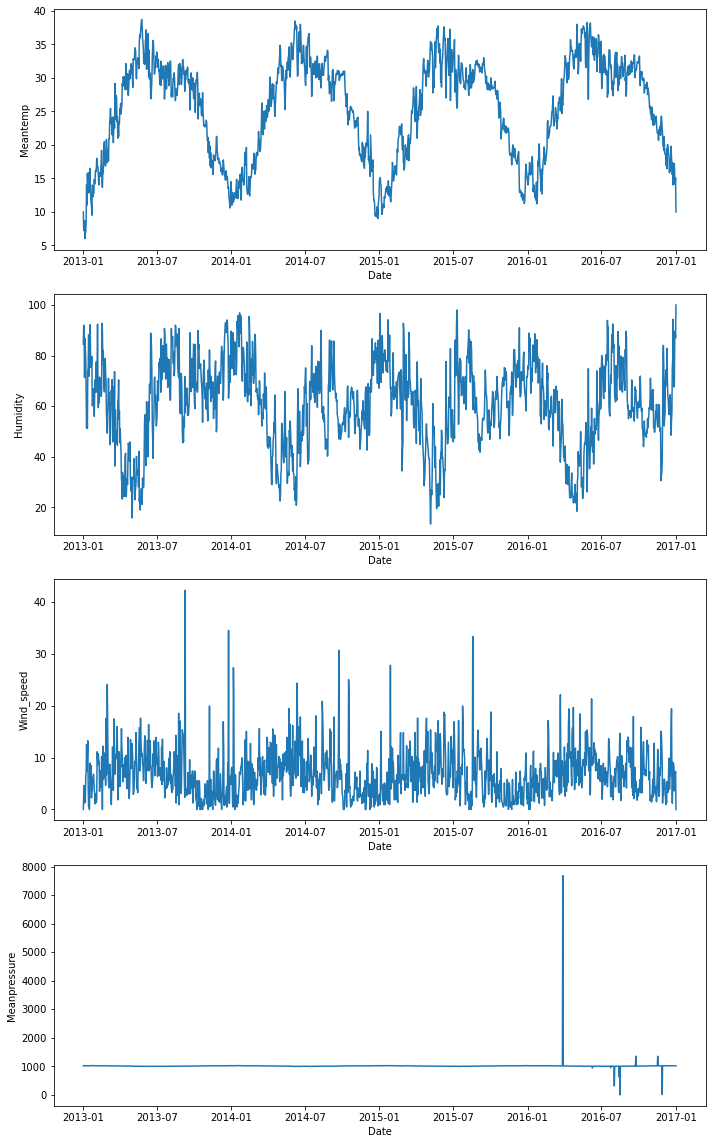

In [109]:
columns_to_plot = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 4 * len(columns_to_plot)))
for i, column in enumerate(columns_to_plot):
    sns.lineplot(data=train_data, x=train_data.index, y=column, ax=axes[i])
    axes[i].set_ylabel(f'{column.capitalize()}')
    axes[i].set_xlabel('Date')
plt.tight_layout()
plt.show()

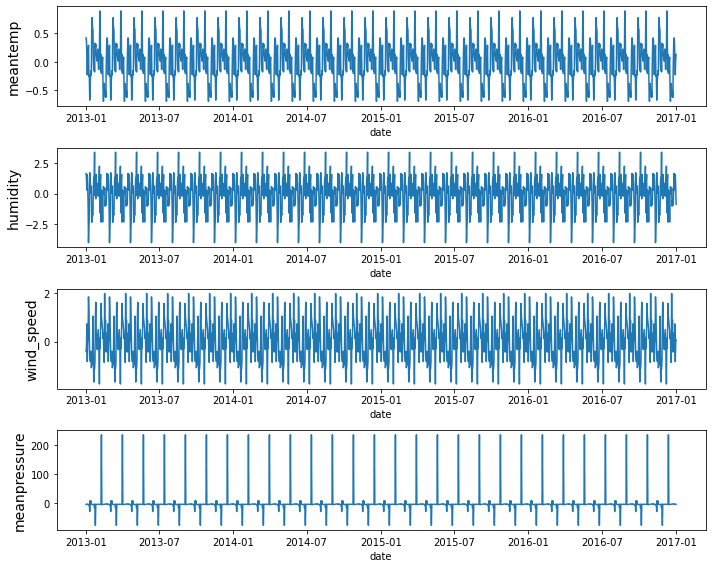

In [110]:
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for column in columns:
    decomp = seasonal_decompose(train_data[column], period=52, model='additive', extrapolate_trend='freq')
    train_data[f"{column}_trend"] = decomp.trend
    train_data[f"{column}_seasonal"] = decomp.seasonal
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 8))
for i, column in enumerate(columns):
    sns.lineplot(x=train_data.index, y=train_data[column + '_seasonal'], ax=ax[i])
    ax[i].set_ylabel(ylabel=column, fontsize=14)
plt.tight_layout()
plt.show()

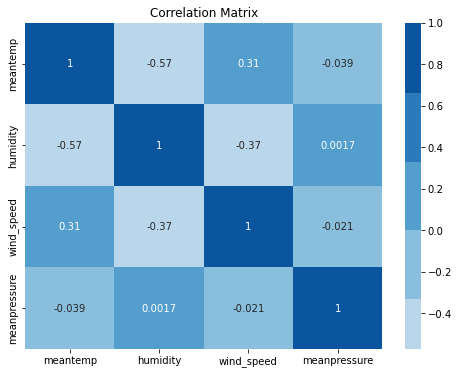

In [111]:
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
correlation_matrix = train_data[columns].corr()
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Blues")
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0)
plt.title('Correlation Matrix')
plt.show()

Overall RMSE for meantemp in 2016: 2.484655622249833
Overall RMSE for humidity in 2016: 9.28263977032588
Overall RMSE for wind_speed in 2016: 3.6032710503304686
Overall RMSE for meanpressure in 2016: 269.75108376842064


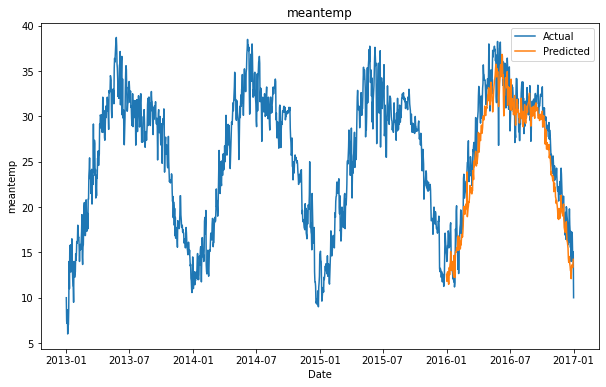

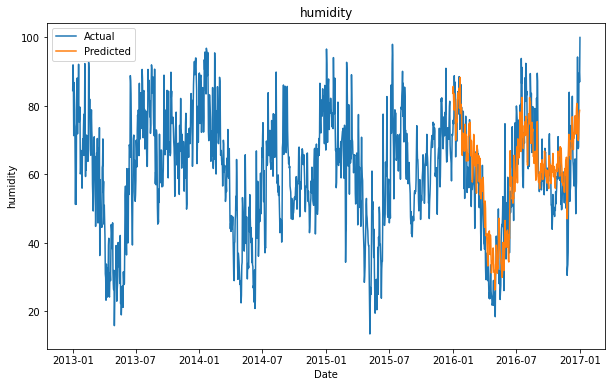

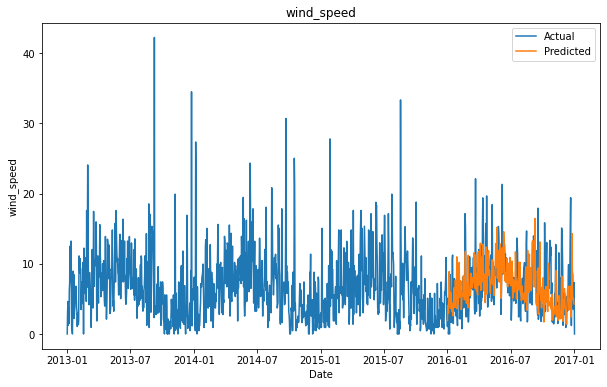

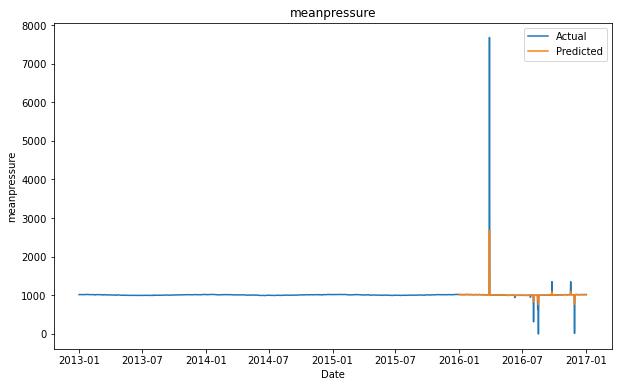

Overall RMSE for meantemp in 2016: 2.484655622249833
Overall RMSE for humidity in 2016: 9.28263977032588
Overall RMSE for wind_speed in 2016: 3.6032710503304686
Overall RMSE for meanpressure in 2016: 269.75108376842064


In [112]:
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

for column in columns:
    decomp = seasonal_decompose(train_data[column], period=365, model='additive', extrapolate_trend='freq')
    train_data[f"{column}_trend"] = decomp.trend
    train_data[f"{column}_seasonal"] = decomp.seasonal
averages = train_data.groupby([train_data.index.month, train_data.index.day])[columns].mean()
predicted_data = pd.DataFrame(columns=columns)
for month, day in averages.index:
    try:
        prediction_date = pd.Timestamp(year=train_data.index.max().year - 1, month=month, day=day)
        predicted_values = averages.loc[(month, day)]
        predicted_data = predicted_data.append(pd.Series(predicted_values, name=prediction_date))
    except ValueError:
        pass  
overall_rmse_values = []
for i, column in enumerate(columns):
    actual_column_values = train_data[column].loc[train_data.index.year == train_data.index.max().year - 1]
    predicted_column_values = predicted_data[column]
    
    rmse = np.sqrt(mean_squared_error(actual_column_values, predicted_column_values))
    overall_rmse_values.append(rmse)
    print(f"Overall RMSE for {column} in {train_data.index.max().year - 1}: {rmse}")
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=train_data, x=train_data.index, y=column, label='Actual')
    sns.lineplot(data=predicted_data, x=predicted_data.index, y=column, label='Predicted')
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()
for i, column in enumerate(columns):
    print(f"Overall RMSE for {column} in {train_data.index.max().year - 1}: {overall_rmse_values[i]}")

###### 